In [ ]:
# Let's begin by importing the necessary libraries and loading the dataset.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("/content/titanic_processed.csv")
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train test validation split

In [ ]:
# 80 : 20 train-test split respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)


Training features shape: (712, 9)
Testing features shape: (179, 9)


## Hyperparameter Tuning (with Grid Search CV)

In [ ]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Cross-Validation Accuracy:", rf_grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Best Cross-Validation Accuracy: 0.8300009849305624


In [ ]:
# Logistic Regression Hyperparameter Tuning
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
lr_grid_search.fit(X_train, y_train)

print("Logistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Cross-Validation Accuracy:", lr_grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Best Cross-Validation Accuracy: 0.8033389146065202


In [ ]:
# Neural Network Hyperparameter Tuning
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
nn = MLPClassifier(max_iter=1000, random_state=42)
nn_grid_search = GridSearchCV(estimator=nn, param_grid=nn_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
nn_grid_search.fit(X_train, y_train)

print("Neural Network Best Parameters:", nn_grid_search.best_params_)
print("Neural Network Best Cross-Validation Accuracy:", nn_grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Neural Network Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Neural Network Best Cross-Validation Accuracy: 0.8075347188023244


# Evaluation on test set


Random Forest Test Set Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



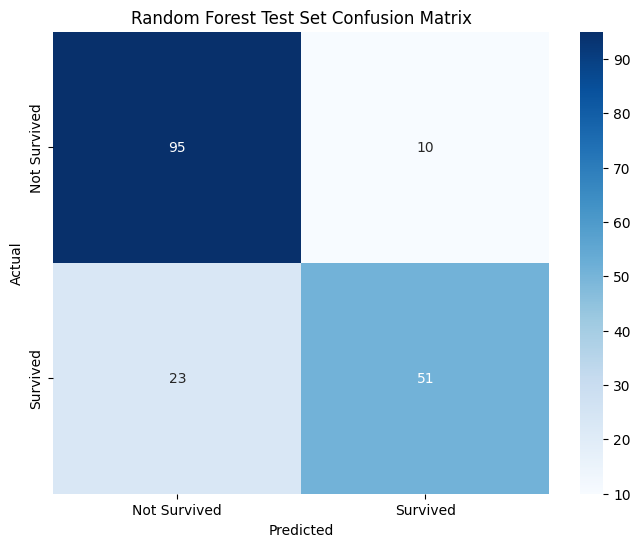


Logistic Regression Test Set Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



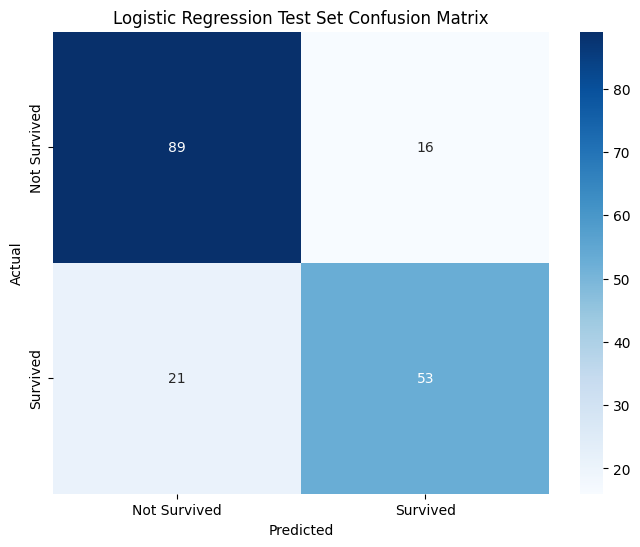


Neural Network Test Set Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.66      0.72        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



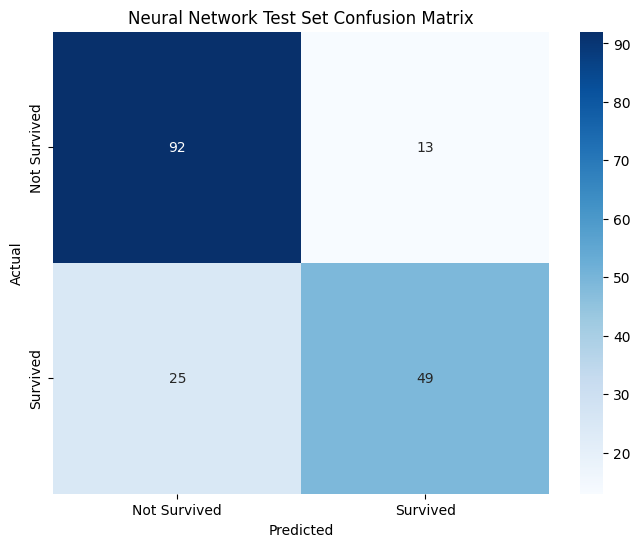

In [ ]:
# Evaluate the best models on the test set
final_models = {
    'Random Forest': rf_grid_search.best_estimator_,
    'Logistic Regression': lr_grid_search.best_estimator_,
    'Neural Network': nn_grid_search.best_estimator_,
}

test_results = {}
for model_name, model in final_models.items():
    y_test_pred = model.predict(X_test)

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    test_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # Print classification report
    print(f"\n{model_name} Test Set Results:")
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'{model_name} Test Set Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [16]:
print("\nTest Set Accuracy Scores:")
for model_name, metrics in test_results.items():
    print(f"{model_name}: Accuracy = {metrics['accuracy']:.4f}, Precision = {metrics['precision']:.4f}, Recall = {metrics['recall']:.4f}, F1 Score = {metrics['f1_score']:.4f}")


Test Set Accuracy Scores:
Random Forest: Accuracy = 0.8156, Precision = 0.8361, Recall = 0.6892, F1 Score = 0.7556
Logistic Regression: Accuracy = 0.7933, Precision = 0.7681, Recall = 0.7162, F1 Score = 0.7413
Neural Network: Accuracy = 0.7877, Precision = 0.7903, Recall = 0.6622, F1 Score = 0.7206


**Let's save the best model**

In [21]:
best_model_name = max(test_results, key=lambda model: test_results[model]['accuracy'])
best_model = final_models[best_model_name]

In [22]:
best_model_name

'Random Forest'

In [23]:
import joblib

joblib.dump(best_model, 'best_titanic_model.pkl')
print(f"Best model '{best_model_name}' saved as 'best_titanic_model.pkl'")

Best model 'Random Forest' saved as 'best_titanic_model.pkl'
